In [ ]:
!pip install muspy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 35.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.1/119.1 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.4 MB/s eta 0:00:00
  Created wheel for pretty-midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592287 sha256=2c2f6b239af214e475253b8067dc8140192c4a0e49fa8bac3fafc261e6eaebfd
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty-midi


In [ ]:
!pip install music21

In [ ]:
!pip install lilypond

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 18.3 MB/s eta 0:00:00


In [ ]:
!unzip /content/EMOPIA_1.0.zip

Archive:  /content/EMOPIA_1.0.zip
   creating: EMOPIA_1.0/
   creating: EMOPIA_1.0/tagging_lists/
  inflating: __MACOSX/EMOPIA_1.0/._tagging_lists  
  inflating: EMOPIA_1.0/.DS_Store    
  inflating: __MACOSX/EMOPIA_1.0/._.DS_Store  
  inflating: EMOPIA_1.0/metadata_by_song.csv  
   creating: EMOPIA_1.0/songs_lists/
  inflating: __MACOSX/EMOPIA_1.0/._songs_lists  
   creating: EMOPIA_1.0/midis/
  inflating: EMOPIA_1.0/README.md    
  inflating: __MACOSX/EMOPIA_1.0/._README.md  
  inflating: EMOPIA_1.0/label.csv    
  inflating: __MACOSX/EMOPIA_1.0/._label.csv  
   creating: EMOPIA_1.0/scripts/
   creating: EMOPIA_1.0/metadata/
  inflating: __MACOSX/EMOPIA_1.0/._metadata  
  inflating: EMOPIA_1.0/tagging_lists/Q1_K6OFDxBU370.txt  
  inflating: __MACOSX/EMOPIA_1.0/tagging_lists/._Q1_K6OFDxBU370.txt  
  inflating: EMOPIA_1.0/tagging_lists/Q1_zmZHNy9T8Pg.txt  
  inflating: __MACOSX/EMOPIA_1.0/tagging_lists/._Q1_zmZHNy9T8Pg.txt  
  inflating: EMOPIA_1.0/tagging_lists/Q3_PLfFWFZflQU.txt  
  

In [ ]:
import os
from music21 import converter, instrument, note, chord
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import torch
from torch.utils.data import Dataset, DataLoader
import random
import pandas as pd
import seaborn as sns

# Path to the EMOPIA dataset's MIDI files
filepath = "/content/EMOPIA_1.0/midis"
label_path = "/content/EMOPIA_1.0/label.csv"

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### Data Exploration

In [ ]:
# Load the label.csv file
labels_df = pd.read_csv(label_path, delimiter=",")
print("Columns in label.csv:", labels_df.columns)

Columns in label.csv: Index(['ID', '4Q', 'annotator'], dtype='object')


In [ ]:
# Extract unique IDs and their 4Q labels
labels_df = labels_df[["ID", "4Q"]]
labels_mapping = {
    1: "HVHA",
    2: "HVLA",
    3: "LVHA",
    4: "LVLA"
}
labels_df["4Q_label"] = labels_df["4Q"].map(labels_mapping)

# Convert to a dictionary mapping file IDs to 4Q labels
file_to_emotion = labels_df.set_index("ID")["4Q"].to_dict()
print("Label mapping loaded:", len(file_to_emotion))

Label mapping loaded: 1078


In [ ]:
labels_df.head()

,ID,4Q,4Q_label
0,Q1_0vLPYiPN7qY_0,1,HVHA
1,Q1_0vLPYiPN7qY_1,1,HVHA
2,Q1_0vLPYiPN7qY_2,1,HVHA
3,Q1_1Qc15G0ZHIg_1,1,HVHA
4,Q1_1Qc15G0ZHIg_2,1,HVHA


In [ ]:
file_to_emotion

{'Q1_0vLPYiPN7qY_0': 1,
 'Q1_0vLPYiPN7qY_1': 1,
 'Q1_0vLPYiPN7qY_2': 1,
 'Q1_1Qc15G0ZHIg_1': 1,
 'Q1_1Qc15G0ZHIg_2': 1,
 'Q1_1Qc15G0ZHIg_3': 1,
 'Q1_1vjy9oMFa8c_2': 1,
 'Q1_1vjy9oMFa8c_4': 1,
 'Q1_1vjy9oMFa8c_5': 1,
 'Q1_2Z9SjI131jA_0': 1,
 'Q1_2Z9SjI131jA_1': 1,
 'Q1_2Z9SjI131jA_10': 1,
 'Q1_2Z9SjI131jA_11': 1,
 'Q1_2Z9SjI131jA_12': 1,
 'Q1_2Z9SjI131jA_13': 1,
 'Q1_2Z9SjI131jA_14': 1,
 'Q1_2Z9SjI131jA_15': 1,
 'Q1_2Z9SjI131jA_2': 1,
 'Q1_2Z9SjI131jA_3': 1,
 'Q1_2Z9SjI131jA_4': 1,
 'Q1_2Z9SjI131jA_7': 1,
 'Q1_2Z9SjI131jA_8': 1,
 'Q1_2Z9SjI131jA_9': 1,
 'Q1_3N2G21U7guk_3': 1,
 'Q1_3N2G21U7guk_5': 1,
 'Q1_3N2G21U7guk_6': 1,
 'Q1_3ahg_eQZhxs_0': 1,
 'Q1_3ahg_eQZhxs_1': 1,
 'Q1_4dXC1cC7crw_0': 1,
 'Q1_4dXC1cC7crw_1': 1,
 'Q1_4ydjOX3pWds_0': 1,
 'Q1_4ydjOX3pWds_1': 1,
 'Q1_5Ju9q1N2x0E_2': 1,
 'Q1_5NW0zDu6IYM_2': 1,
 'Q1_60LLKmpgzRM_0': 1,
 'Q1_6Uf9XBUD3wE_0': 1,
 'Q1_6Uf9XBUD3wE_1': 1,
 'Q1_6kRPHamGDSo_0': 1,
 'Q1_6kRPHamGDSo_1': 1,
 'Q1_6kRPHamGDSo_3': 1,
 'Q1_6wFJhmhNeeg_0': 1,
 'Q1_7yW9c

We first make a list of all the songs as a music21 stream.

In [ ]:
def load_midi_files_with_emotions(filepath, file_to_emotion):
    midi_files = []
    file_emotions = []
    for file in os.listdir(filepath):
        if file.endswith(".mid"):
            file_id = file.split(".mid")[0]  # Extract file ID
            if file_id in file_to_emotion:  # Check if file has a label
                dir = os.path.join(filepath, file)
                midi = converter.parse(dir)
                midi_files.append(midi)
                file_emotions.append(file_to_emotion[file_id])
            else:
                print(f"Warning: No label found for file {file}")
    print(f"Total MIDI files loaded with labels: {len(midi_files)}")
    return midi_files, file_emotions

In [ ]:
# Load MIDI files and their emotions
all_midis, emotions = load_midi_files_with_emotions(filepath, file_to_emotion)

Total MIDI files loaded with labels: 1078


Next, extracting components, in our case, piano chords and notes.

Note: building block
Chord: A group of notes

In [ ]:
def extract_notes(midi_files):
    notes = []
    for file in midi_files:
        songs = instrument.partitionByInstrument(file)
        for part in songs.parts:
            for element in part.recurse():
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                elif isinstance(element, chord.Chord):
                    notes.append(".".join(str(n) for n in element.normalOrder))
    return notes

In [ ]:
Corpus = extract_notes(all_midis)
print("Total notes in all the midis in the dataset:", len(Corpus))

Total notes in all the midis in the dataset: 266887


In [ ]:
!pip install pretty_midi
!apt-get install -y fluidsynth

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libevdev2 libfluidsynth3 libgudev-1.0-0 libinput-bin libinput10
  libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a libqt5dbus5 libqt5gui5 libqt5network5
  libqt5svg5 libqt5widgets5 libwacom-bin libwacom-common libwacom9 libxcb-icccm4 libxcb-image0
  libxcb-keysyms1 libxcb-render-util0 libxcb-util1 libxcb-xinerama0 libxcb-xinput0 libxcb-xkb1
  libxkbcommon-x11-0 qsynth qt5-gtk-platformtheme qttranslations5-l10n timgm6mb-soundfont
Suggested packages:
  fluid-soundfont-gs qt5-image-formats-plugins qtwayland5 jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libevdev2 libfluidsynth3 libgudev-1.0-0 libinput-bin libinput10
  libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a libqt5dbus5 libqt5gui5 libqt5network5
  libqt5svg5 libqt5widgets5 libwacom-bin libwacom-common libwacom9 libxcb-icc

In [ ]:
# Download FluidR3_GM.sf2 (a popular SoundFont)
!wget https://github.com/urish/pianolite/raw/main/soundfonts/FluidR3_GM.sf2

--2024-12-24 15:43:43--  https://github.com/urish/pianolite/raw/main/soundfonts/FluidR3_GM.sf2
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-12-24 15:43:43 ERROR 404: Not Found.



In [ ]:
from IPython.display import Audio
import pretty_midi

# Path to the SoundFont (.sf2 file)
sf2_path = 'FluidR3_GM.sf2'  # Change to your SoundFont file path
midi_file = '/content/EMOPIA_1.0/midis/Q1_0vLPYiPN7qY_0.mid'  # Change to your MIDI file path

# Load the MIDI file
music = pretty_midi.PrettyMIDI(midi_file=midi_file)

# Convert the MIDI to a waveform using the SoundFont
waveform = music.fluidsynth(sf2_path=sf2_path)

# Display the waveform for playback
Audio(waveform, rate=44100)


ImportError: fluidsynth() was called but pyfluidsynth is not installed.

In [ ]:
# Count the frequency of each note
count_num = Counter(Corpus)
Recurrence = list(count_num.values())

In [ ]:
#Exploring the notes dictionary
Notes = list(count_num.keys())
Recurrence = list(count_num.values())
#Average recurrenc for a note in Corpus
def Average(lst):
    return sum(lst) / len(lst)
print("Average recurrenc for a note in Corpus:", Average(Recurrence))
print("Most frequent note in Corpus appeared:", max(Recurrence), "times")
print("Least frequent note in Corpus appeared:", min(Recurrence), "time")

Average recurrenc for a note in Corpus: 389.6160583941606
Most frequent note in Corpus appeared: 6799 times
Least frequent note in Corpus appeared: 1 time


In [ ]:
# Remove rare notes (frequency < 100)
rare_notes = [key for key, value in count_num.items() if value < 100]
Corpus = [note for note in Corpus if note not in rare_notes]
print("Length of Corpus after removing rare notes:", len(Corpus))

Length of Corpus after removing rare notes: 260466


In [ ]:
# Create mappings for notes to integers
symb = sorted(list(set(Corpus)))
mapping = {note: idx for idx, note in enumerate(symb)}
reverse_mapping = {idx: note for note, idx in mapping.items()}
vocab_size = len(symb)
print("Total notes in Corpus:", len(Corpus))
print("Unique notes:", vocab_size)

Total notes in Corpus: 260466
Unique notes: 174


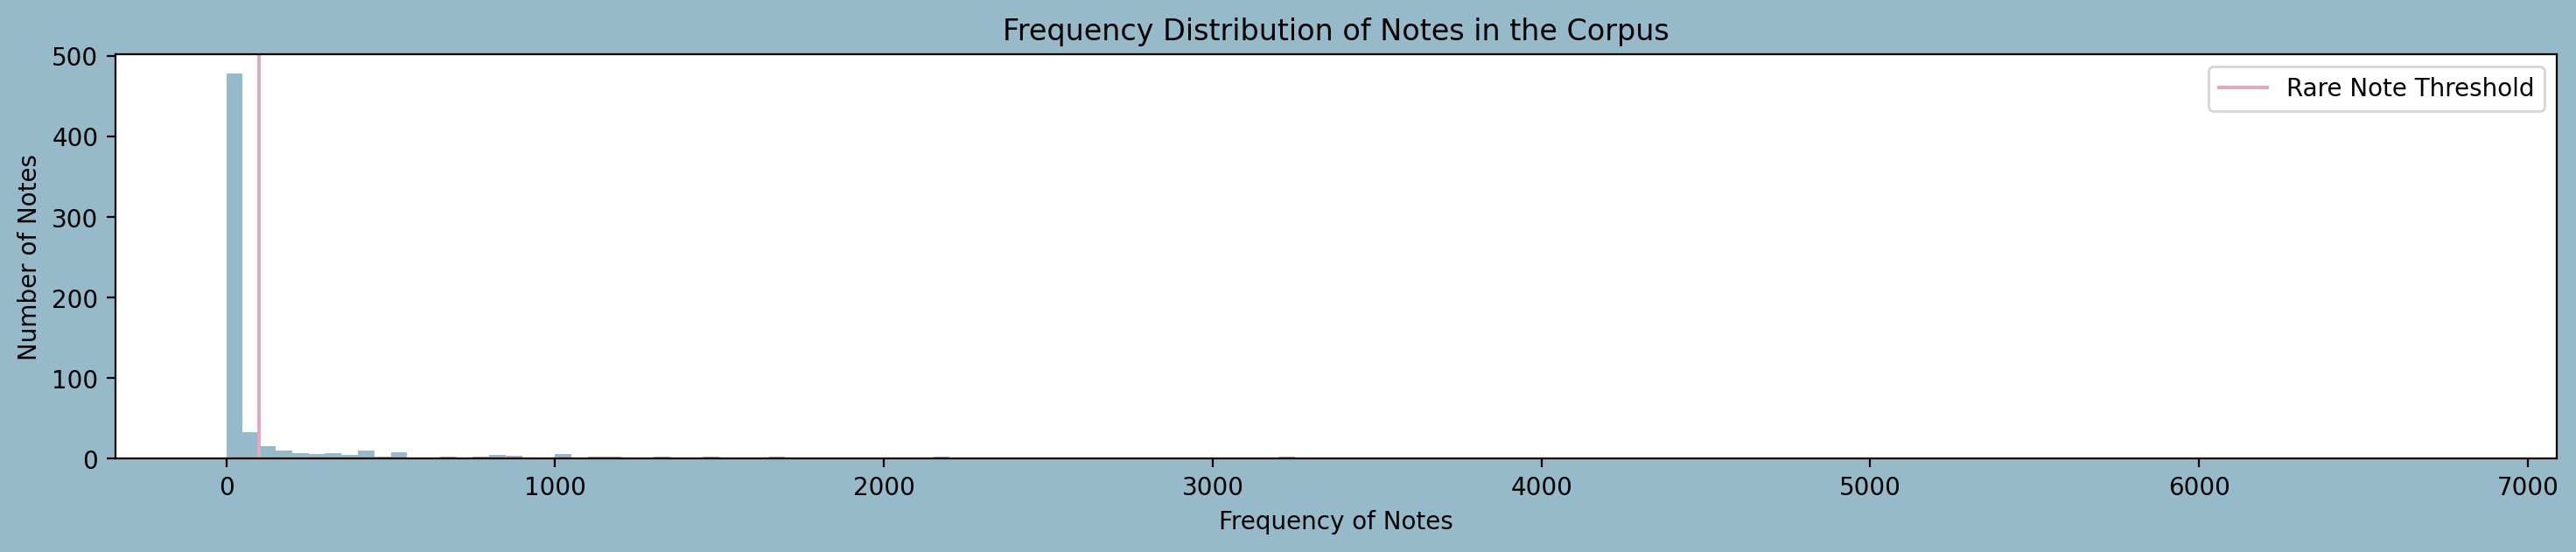

In [ ]:
# Plot the frequency distribution
plt.figure(figsize=(18, 3), facecolor="#97BACB")
bins = np.arange(0, max(Recurrence), 50)
plt.hist(Recurrence, bins=bins, color="#97BACB")
plt.axvline(x=100, color="#DBACC1", label="Rare Note Threshold")
plt.title("Frequency Distribution of Notes in the Corpus")
plt.xlabel("Frequency of Notes")
plt.ylabel("Number of Notes")
plt.legend()
plt.show()

### Data Preprocessing

Now, we create a dictionary to map the notes to the indices or numbers. Then we encode and split the corpus into smaller sequences of equal length.

In [ ]:
# Create mappings for notes to integers
symb = sorted(list(set(Corpus)))
mapping = {note: idx for idx, note in enumerate(symb)}
reverse_mapping = {idx: note for note, idx in mapping.items()}

In [ ]:
# Create input sequences, targets, and emotion labels
def create_sequences_with_emotion(Corpus, emotions, length=40):
    features, targets, emotion_labels = [], [], []
    corpus_length = len(Corpus)
    file_start_idx = 0

    # Iterate through files and match sequences with emotions
    for file_idx, emotion in enumerate(emotions):
        file_length = len(all_midis[file_idx].flat.notes)  # Ensure length matches the current file
        file_corpus = Corpus[file_start_idx:file_start_idx + file_length]
        file_start_idx += file_length

        # Create sequences and attach emotion labels
        for i in range(0, len(file_corpus) - length, 1):
            feature = file_corpus[i:i + length]  # Input sequence
            target = file_corpus[i + length]    # Target note
            features.append([mapping[note] for note in feature])
            targets.append(mapping[target])
            emotion_labels.append(emotion)     # Append corresponding emotion

    # Return features, targets, and emotion labels
    return features, targets, emotion_labels


In [ ]:
sequence_length = 40
features, targets, emotion_labels = create_sequences_with_emotion(Corpus, emotions, sequence_length)
print("Total sequences created:", len(targets))

/usr/local/lib/python3.10/dist-packages/music21/stream/base.py:3689: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


Total sequences created: 218386


In [ ]:
# len(features)
features

[[136,
  148,
  154,
  104,
  148,
  154,
  136,
  154,
  172,
  84,
  84,
  172,
  172,
  154,
  148,
  104,
  122,
  59,
  135,
  148,
  148,
  154,
  104,
  122,
  59,
  135,
  104,
  136,
  154,
  133,
  153,
  100,
  136,
  104,
  136,
  154,
  100,
  148,
  154,
  104],
 [148,
  154,
  104,
  148,
  154,
  136,
  154,
  172,
  84,
  84,
  172,
  172,
  154,
  148,
  104,
  122,
  59,
  135,
  148,
  148,
  154,
  104,
  122,
  59,
  135,
  104,
  136,
  154,
  133,
  153,
  100,
  136,
  104,
  136,
  154,
  100,
  148,
  154,
  104,
  136],
 [154,
  104,
  148,
  154,
  136,
  154,
  172,
  84,
  84,
  172,
  172,
  154,
  148,
  104,
  122,
  59,
  135,
  148,
  148,
  154,
  104,
  122,
  59,
  135,
  104,
  136,
  154,
  133,
  153,
  100,
  136,
  104,
  136,
  154,
  100,
  148,
  154,
  104,
  136,
  154],
 [104,
  148,
  154,
  136,
  154,
  172,
  84,
  84,
  172,
  172,
  154,
  148,
  104,
  122,
  59,
  135,
  148,
  148,
  154,
  104,
  122,
  59,
  135,
  104,
  136

In [ ]:
targets

[136,
 154,
 104,
 136,
 172,
 81,
 172,
 172,
 104,
 74,
 172,
 81,
 74,
 100,
 59,
 10,
 104,
 148,
 100,
 123,
 104,
 136,
 153,
 36,
 36,
 104,
 136,
 153,
 104,
 136,
 148,
 154,
 104,
 151,
 134,
 154,
 151,
 134,
 103,
 39,
 135,
 104,
 154,
 172,
 169,
 170,
 134,
 115,
 169,
 170,
 134,
 115,
 172,
 135,
 76,
 104,
 135,
 41,
 154,
 104,
 102,
 148,
 146,
 122,
 147,
 102,
 148,
 146,
 122,
 104,
 147,
 104,
 148,
 103,
 136,
 104,
 104,
 154,
 134,
 103,
 135,
 103,
 104,
 147,
 134,
 103,
 135,
 104,
 154,
 147,
 136,
 148,
 104,
 154,
 151,
 134,
 103,
 68,
 136,
 104,
 135,
 104,
 135,
 134,
 68,
 151,
 103,
 136,
 104,
 74,
 116,
 172,
 171,
 169,
 134,
 170,
 172,
 136,
 115,
 116,
 172,
 135,
 171,
 40,
 169,
 171,
 170,
 40,
 134,
 115,
 116,
 172,
 135,
 172,
 36,
 102,
 146,
 103,
 146,
 36,
 102,
 103,
 170,
 108,
 78,
 108,
 158,
 102,
 7,
 104,
 7,
 102,
 159,
 171,
 127,
 104,
 129,
 158,
 136,
 102,
 158,
 136,
 127,
 129,
 7,
 103,
 102,
 102,
 134,
 104,
 102,

In [ ]:
emotion_labels

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


### Data Loading

In [ ]:
class MusicDataset(Dataset):
    def __init__(self, features, targets, emotions):
        """
        Args:
            features (list of lists): Input sequences of note indices.
            targets (list): Target note indices.
            emotions (list): Emotion labels for each sequence.
        """
        self.features = features
        self.targets = targets
        self.emotions = emotions

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        # Convert features, targets, and emotions to tensors
        seq_in = torch.tensor(self.features[idx]).long()
        seq_out = torch.tensor(self.targets[idx]).long()
        emotion = torch.tensor(self.emotions[idx]).long()  # Numerical emotion
        return seq_in, seq_out, emotion

Dataset size: 218386
Input shape: torch.Size([64, 40])
Target shape: torch.Size([64])
Emotion shape: torch.Size([64])


In [ ]:
from torch.utils.data import DataLoader

In [ ]:
dataset = MusicDataset(features, targets, emotion_labels)
batch_size = 16

In [ ]:
dataloader = DataLoader(dataset, batch_size = batch_size, shuffle = True)

In [ ]:
for seq_in, seq_out, emotion in dataloader:
    print("Input shape:", seq_in.shape)
    print("Target shape:", seq_out.shape)
    print("Emotion shape:", emotion.shape)
    break

Input shape: torch.Size([16, 40])
Target shape: torch.Size([16])
Emotion shape: torch.Size([16])


### LSTM

In [ ]:
import torch.nn as nn

In [ ]:
class MusicGenerationModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, emotion_dim, hidden_dim=256, num_emotions=4):
        super(MusicGenerationModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.emotion_embedding = nn.Embedding(num_emotions, emotion_dim)
        self.lstm = nn.LSTM(embedding_dim + emotion_dim, hidden_dim, num_layers=2, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x, emotion):
      # Debugging shapes
      print(f"x shape: {x.shape}")  # [batch_size, seq_len]
      print(f"emotion shape: {emotion.shape}")  # [batch_size]

      # Embeddings
      note_embedded = self.note_embedding(x)  # [batch_size, seq_len, 128]
      emotion_embedded = self.emotion_embedding(emotion)  # [batch_size, 128]
      print(f"note_embedded shape: {note_embedded.shape}")
      print(f"emotion_embedded shape: {emotion_embedded.shape}")

      # Expand emotion embeddings
      emotion_expanded = emotion_embedded.unsqueeze(1).expand(-1, x.size(1), -1)  # [batch_size, seq_len, 128]

      # Concatenate note and emotion embeddings
      combined = torch.cat((note_embedded, emotion_expanded), dim=2)  # [batch_size, seq_len, 256]

      # LSTM
      output, _ = self.lstm(combined)  # [batch_size, seq_len, 256]

      # Final output (use the last time step)
      output = self.fc(output[:, -1, :])  # [batch_size, 174]
      return output



### Training

In [ ]:
import torch.optim as optim

In [ ]:
# Training the model
def train_model(model, data_loader, criterion, optimizer, num_epochs, device):
    model.to(device)
    model.train()

    for epoch in range(num_epochs):
        total_loss = 0.0

        for features, targets, emotions in data_loader:
            features, targets, emotions = features.to(device), targets.to(device), emotions.to(device)

            optimizer.zero_grad()
            outputs = model(features, emotions)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(data_loader):.4f}")

    print("Training Complete")

In [ ]:
# Evaluation function
def evaluate_model(model, data_loader, criterion, device):
    model.to(device)
    model.eval()

    total_loss = 0.0
    all_predictions = []
    all_targets = []

    with torch.no_grad():
        for features, targets, emotions in data_loader:
            features, targets, emotions = features.to(device), targets.to(device), emotions.to(device)

            outputs = model(features, emotions)
            loss = criterion(outputs, targets)

            total_loss += loss.item()
            predictions = torch.argmax(outputs, dim=1)
            all_predictions.extend(predictions.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())

    accuracy = (np.array(all_predictions) == np.array(all_targets)).mean()
    print(f"Validation Loss: {total_loss/len(data_loader):.4f}, Accuracy: {accuracy*100:.2f}%")

In [ ]:
# Music generation
def generate_music(model, seed_sequence, emotion_label, num_notes, mapping, device):
    model.to(device)
    model.eval()

    generated_sequence = seed_sequence[:]

    with torch.no_grad():
        for _ in range(num_notes):
            input_sequence = torch.tensor([mapping[note] for note in generated_sequence[-40:]], dtype=torch.long).unsqueeze(0).to(device)
            emotion_tensor = torch.tensor([emotion_label], dtype=torch.long).to(device)

            output = model(input_sequence, emotion_tensor)
            predicted_note = torch.argmax(output, dim=1).item()

            # Reverse map the predicted note back to its string representation
            predicted_note_str = {v: k for k, v in mapping.items()}[predicted_note]
            generated_sequence.append(predicted_note_str)

    return generated_sequence

In [ ]:
# Hyperparameters
batch_size = 64
num_epochs = 20
learning_rate = 0.001
sequence_length = 40

# Dataset and DataLoader
# features_tensor = torch.tensor(features, dtype=torch.long)
# targets_tensor = torch.tensor(targets, dtype=torch.long)
# emotion_tensor = torch.tensor(emotion, dtype=torch.long)

# Model, Loss, Optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the emotion dimension and number of emotions
emotion_dim = 128
num_emotions = vocab_size

# Model, Loss, Optimizer
model = MusicGenerationModel(vocab_size=len(mapping),
                             embedding_dim=128,
                             emotion_dim=emotion_dim,
                             hidden_dim=256,
                             num_emotions=num_emotions)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
model

MusicGenerationModel(
  (embedding): Embedding(174, 128)
  (emotion_embedding): Embedding(174, 128)
  (lstm): LSTM(256, 256, num_layers=2, batch_first=True)
  (fc): Linear(in_features=256, out_features=174, bias=True)
)

In [ ]:
# Training
train_model(model, dataloader, criterion, optimizer, num_epochs, device)

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
# Save the model
torch.save(model.state_dict(), "emotion_music_model.pth")
print("Model saved.")

In [ ]:
checkpoint_path = "checkpoint.pth"

torch.save({
    # Save the current epoch number
    'epoch': epoch,
    # Save the model's parameters
    'model_state_dict': model.state_dict(),
    # Save the state of optimizer
    'optimizer_state_dict': optimizer.state_dict(),
    # Save the training loss
    'train_loss': loss,
    # Save the validation loss
    # 'val_loss': epoch_val_loss,
    # Save the training Dice score
    # 'train_dice': epoch_train_dice,
    # Save the validation Dice score
    # 'val_dice': epoch_val_dice,
}, checkpoint_path)

NameError: name 'epoch' is not defined

In [ ]:
checkpoint = torch.load("model_checkpoint.pth")

# Load model weights
model.load_state_dict(checkpoint['model_state_dict'])

# Load other training states if needed
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss_value = checkpoint['loss']


<ipython-input-9-592db8a11ad1>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("model_checkpoint.pth")


NameError: name 'model' is not defined

In [ ]:
epoch

0